# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [9]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
%matplotlib inline 
rcParams["figure.figsize"] =20,10

In [22]:
iris = datasets.load_iris() 
X = scale(iris.data[:, :4])  # #表示我們取特徵空間中的4個維度
target = pd.DataFrame(iris.target)
target = pd.DataFrame(iris.target) # define the target
print(X.shape)

(150, 4)


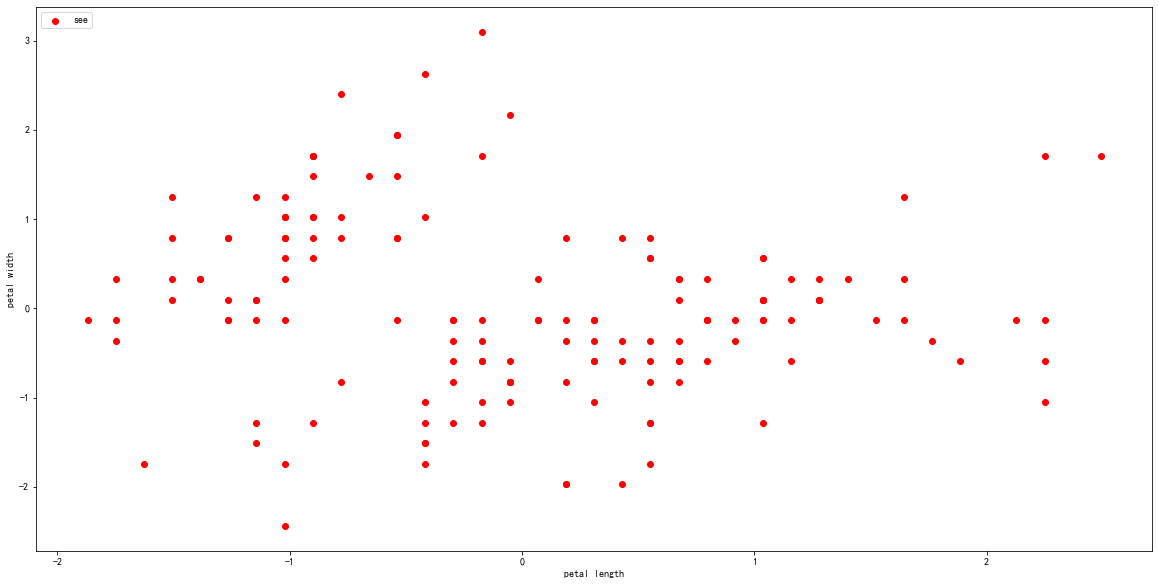

In [18]:
# 繪製數據分佈圖
plt.scatter(X[:, 0], X[:, 1], c="red", marker='o', label='see')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  

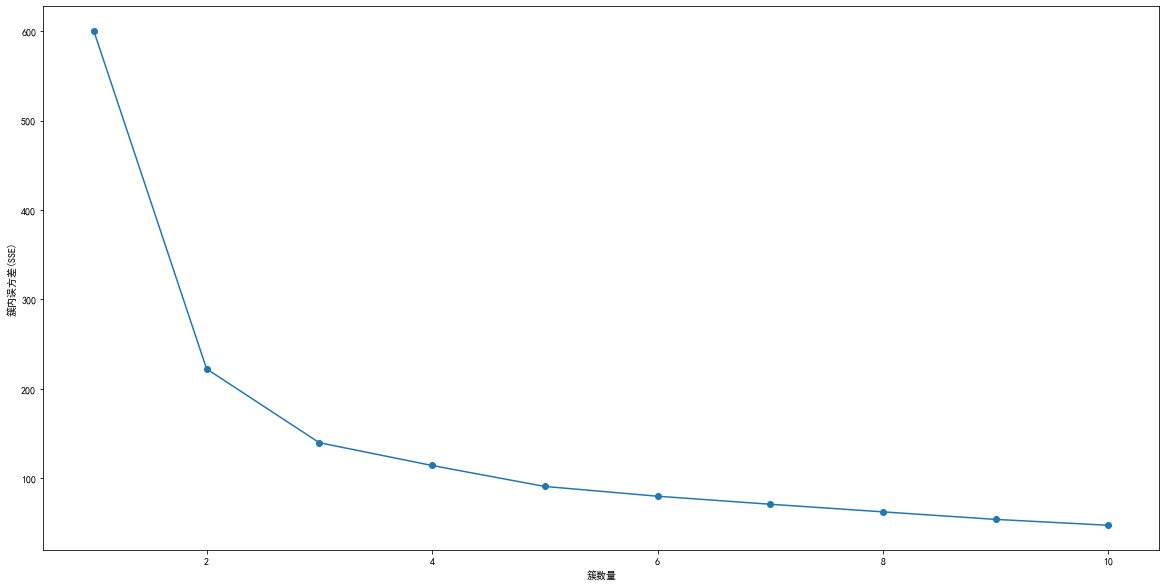

In [19]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#存放不同SSE
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,tol=1e-4,random_state=0)
    km.fit(X)
    #獲取SSE
    distortions.append(km.inertia_)
#繪製曲線
plt.plot(range(1,11),distortions,marker="o")
plt.xlabel("簇数量")
plt.ylabel("簇内误方差(SSE)")
plt.show()

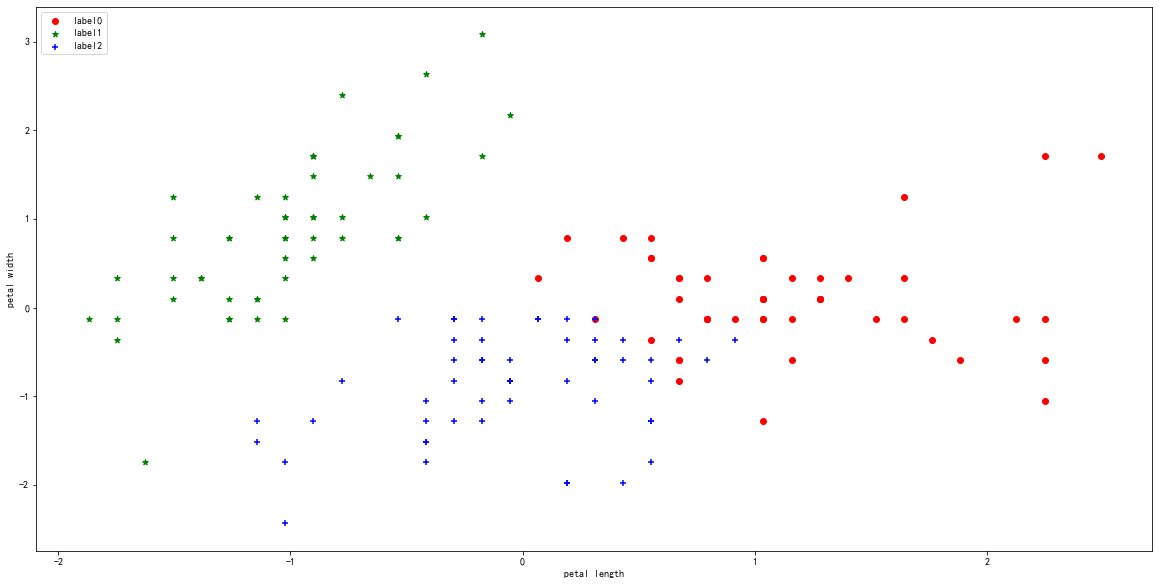

In [20]:
estimator = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)  # 構造聚類器
estimator.fit(X)  # 聚類
label_pred = estimator.labels_  # 獲取聚類標籤
# 繪製k-means結果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')  
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')  
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')  
plt.xlabel('petal length')  
plt.ylabel('petal width')  
plt.legend(loc=2)  
plt.show()  

##分析 cluster 的準確度

In [23]:

relabel = np.choose(estimator.labels_,[2,0,1]).astype(np.int64)
print(classification_report(target,relabel))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



REF:
https://www.datasciencelearner.com/k-means-clustering-in-python-label-dataset/
https://reurl.cc/Mvaz5K
https://zhuanlan.zhihu.com/p/74775484